In [11]:
#About  images folder:
# full contains the picture downloaded from the internet by scraping code.
# full1 contains the standardizing training samples transformed from full
# test contains the picture downloaded from internet as test group
# test1 contains the standardizing test data transformed from test”
# About gray2rgb folder:
# result contains the colorized pictures using the model
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import multi_gpu_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import matplotlib.pyplot as plt # plt show the pictures
import matplotlib.image as mpimg # mpimg read the pictures 
from skimage.io import imsave
import numpy as np
import os
import random

import tensorflow as tf
from PIL import Image #read the pictures
import os.path
import glob

In [12]:

def convertjpg(jpgfile,outdir,width=256,height=256):
    img=Image.open(jpgfile)
    try:
        new_img=img.resize((width,height),Image.BILINEAR)   
        new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
    except Exception as e:
        print(e)
for jpgfile in glob.glob("../images/full/*.jpg"):
    convertjpg(jpgfile,"../images/full1/")
for jpgfile in glob.glob("../images/test/*.jpg"):
    convertjpg(jpgfile,"../images/test1/")

In [24]:
# Get images
X = []
for filename in os.listdir('../images/full1/'):
    X.append(img_to_array(load_img('../images/full1/'+filename)))
image = np.array(X, dtype=float)
image = np.array(image, dtype=float)

In [25]:
image.shape

(110, 256, 256, 3)

In [26]:
X = rgb2lab(1.0/255*image)[:,:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,:,1:]
Y /= 128
X = X.reshape(image.shape[0], 256, 256, 1)
Y = Y.reshape(image.shape[0], 256, 256, 2)

In [27]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [28]:
# Finish model
model.compile(optimizer='rmsprop',
			loss='mse')

In [29]:
history = model.fit(x=X, 
	y=Y,
	batch_size=5,
	epochs=2000)

Epoch 1/2000
110/110 [==============================] - 1s 11ms/step - loss: 0.0577
Epoch 2/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0345
Epoch 3/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0373
Epoch 4/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0357
Epoch 5/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0366
Epoch 6/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0348
Epoch 7/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0366
Epoch 8/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0348
Epoch 9/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0361
Epoch 10/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0340
Epoch 11/2000
110/110 [==============================] - 1s 7ms/step - loss: 0.0339
Epoch 12/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0325


110/110 [==============================] - 1s 6ms/step - loss: 0.0219
Epoch 99/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0223
Epoch 100/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0216
Epoch 101/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0224
Epoch 102/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0209
Epoch 103/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0245
Epoch 104/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0217
Epoch 105/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0212
Epoch 106/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0220
Epoch 107/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0223
Epoch 108/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0206A: 0s - loss:
Epoch 109/2000
110/110 [==============================] - 1s 6ms/ste

110/110 [==============================] - 1s 6ms/step - loss: 0.0150
Epoch 195/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0160
Epoch 196/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0165
Epoch 197/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0159
Epoch 198/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0161
Epoch 199/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0160
Epoch 200/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0158
Epoch 201/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0153
Epoch 202/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0155
Epoch 203/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0164
Epoch 204/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0148
Epoch 205/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 6ms/step - loss: 0.0138
Epoch 291/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 292/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0138
Epoch 293/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 294/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0137
Epoch 295/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0128
Epoch 296/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0140
Epoch 297/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0134
Epoch 298/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0128
Epoch 299/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0133
Epoch 300/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0140
Epoch 301/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 7ms/step - loss: 0.0132
Epoch 387/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 388/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0123
Epoch 389/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 390/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0119
Epoch 391/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0119
Epoch 392/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0117
Epoch 393/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0117
Epoch 394/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0120A: 0s - loss: 0.01
Epoch 395/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 396/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 397/2000
110/110 [==============================] - 1s 6

110/110 [==============================] - 1s 6ms/step - loss: 0.0117
Epoch 482/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0124
Epoch 483/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0105
Epoch 484/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0109A: 0s - loss: 0.011
Epoch 485/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0117
Epoch 486/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0109
Epoch 487/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0119
Epoch 488/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0109
Epoch 489/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0115
Epoch 490/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0111
Epoch 491/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 492/2000
110/110 [==============================] - 1s 

110/110 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 578/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 579/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 580/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0104
Epoch 581/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 582/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0102
Epoch 583/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 584/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0104
Epoch 585/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 586/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 587/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0103
Epoch 588/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 6ms/step - loss: 0.0103
Epoch 674/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0103
Epoch 675/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 676/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 677/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 678/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0102
Epoch 679/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 680/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 681/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 682/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 683/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 684/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 6ms/step - loss: 0.0098
Epoch 770/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0102
Epoch 771/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 772/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 773/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 774/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0099
Epoch 775/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 776/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0098
Epoch 777/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0102
Epoch 778/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 779/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 780/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 866/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 867/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 868/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 869/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 870/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 871/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 872/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 873/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 874/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 875/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 876/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 962/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 963/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 964/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 965/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 966/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 967/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 968/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 969/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 970/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 971/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 972/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.

110/110 [==============================] - 1s 7ms/step - loss: 0.0092
Epoch 1057/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1058/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 1059/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 1060/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1061/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 1062/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1063/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 1064/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1065/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 1066/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 1067/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1152/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 1153/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1154/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 1155/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1156/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0093A: 0s - loss: 0.00
Epoch 1157/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1158/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1159/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1160/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1161/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 1162/2000
110/110 [===========================

110/110 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 1246/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1247/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1248/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1249/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1250/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1251/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1252/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1253/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 1254/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1255/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1256/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 1341/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1342/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0092
Epoch 1343/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1344/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1345/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1346/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 1347/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1348/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1349/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1350/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1351/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1436/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1437/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1438/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1439/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1440/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1441/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1442/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1443/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1444/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1445/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 1446/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1531/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1532/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1533/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1534/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1535/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 1536/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1537/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1538/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 1539/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1540/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1541/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1626/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1627/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 1628/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1629/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1630/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1631/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1632/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1633/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 1634/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1635/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1636/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0076
Epoch 1721/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1722/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1723/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1724/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1725/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1726/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1727/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 1728/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 1729/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1730/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 1731/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 1816/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1817/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 1818/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 1819/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1820/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 1821/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1822/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1823/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1824/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1825/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 1826/2000
110/110 [==============================] - 1s 6ms/step

110/110 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 1911/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 1912/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 1913/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 1914/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 1915/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 1916/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 1917/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1918/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1919/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 1920/2000
110/110 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 1921/2000
110/110 [==============================] - 1s 6ms/step

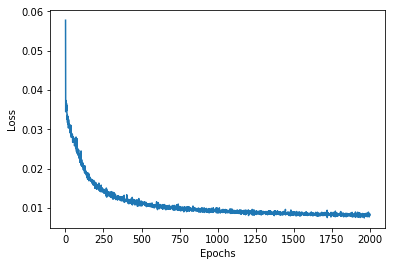

In [30]:
losses = history.history
loss = losses['loss']
epoch = np.arange(1, len(loss)+1, 1)
figure = plt.figure
plt.plot(epoch, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [32]:
plt.savefig('loss_2000')

<Figure size 432x288 with 0 Axes>

In [33]:
color_me = []
for filename in os.listdir('../images/test1/'):
    color_me.append(img_to_array(load_img('../images/test1/'+filename)))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result_2000/img_"+str(i)+".png", lab2rgb(cur))


D:\sw\Anaconda3\lib\site-packages\skimage\color\colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 4 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
D:\sw\Anaconda3\lib\site-packages\skimage\color\colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 2 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
D:\sw\Anaconda3\lib\site-packages\skimage\color\colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
D:\sw\Anaconda3\lib\site-packages\skimage\color\colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 11 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
D:\sw\Anaconda3\lib\site-packages\skimage\color\colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 25 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
